In [128]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [129]:
## load the individual datasets

food = pd.read_csv("food.csv")
food

,Name,Description,Halal Status
0,Camel,Animals,Halal
1,Cow,Animals,Halal
2,Sheep,Animals,Halal
3,Goat,Animals,Halal
4,Deer,Animals,Halal
...,...,...,...
112,Honey,Miscallaneous,Halal
113,Sugar,Miscallaneous,Halal
114,Syrup,Miscallaneous,Halal
115,Chocolate liquor (roasted ground cocoa bean sy...,Miscallaneous,Halal


In [130]:
codes = pd.read_csv("codes1.csv")
codes

,E-Number/Code,Name,Description,Category,Halal Status
0,E100,Curcumin/Turmeric,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
1,E101,Riboflavin (Vitamin B2),Color,Color,"Mushbooh, Halal if it is from plant material/f..."
2,E102,Tartrazine,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
3,E104,Quinoline Yellow,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
4,E110,Sunset Yellow FCF / Orange Yellow S,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
...,...,...,...,...,...
234,920,L-Cysteine Hydrochloride,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,"Mushbooh, Haram if it is obtained from human h..."
235,924,Potassium Bromate,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,Halal
236,925,Chlorine,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,Halal
237,926,Chlorine Dioxide,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,Halal


In [131]:
## check for missing values

In [132]:
food.isnull().sum()

Name            0
Description     0
Halal Status    0
dtype: int64

In [133]:
codes.isnull().sum()

E-Number/Code    0
Name             0
Description      0
Category         0
Halal Status     0
dtype: int64

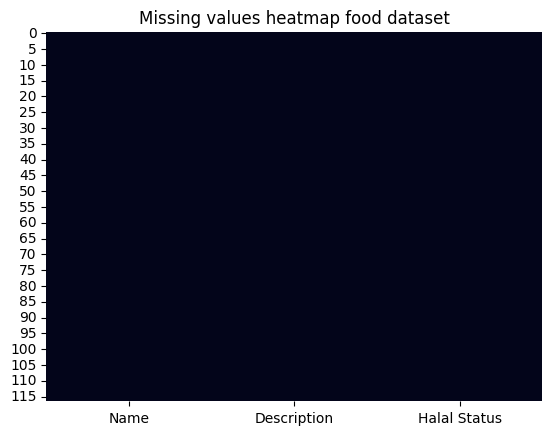

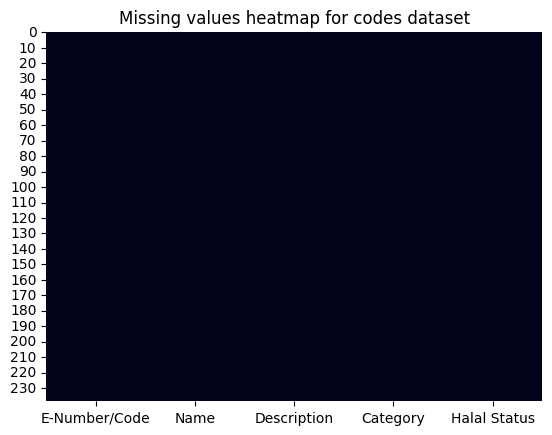

In [134]:
sns.heatmap(food.isnull(), cbar =False)
plt.title("Missing values heatmap food dataset")
plt.show()

sns.heatmap(codes.isnull(), cbar =False)
plt.title("Missing values heatmap for codes dataset")
plt.show()

In [135]:
## view info of data

In [136]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          117 non-null    object
 1   Description   117 non-null    object
 2   Halal Status  117 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [137]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   E-Number/Code  239 non-null    object
 1   Name           239 non-null    object
 2   Description    239 non-null    object
 3   Category       239 non-null    object
 4   Halal Status   239 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


In [138]:
food.shape

(117, 3)

In [139]:
codes.shape

(239, 5)

In [140]:
food.describe()

,Name,Description,Halal Status
count,117,117,117
unique,117,10,3
top,Camel,Animals,Haram
freq,1,33,57


In [141]:
codes.describe()

,E-Number/Code,Name,Description,Category,Halal Status
count,239,239,239,239,239
unique,239,239,37,14,20
top,E100,Curcumin/Turmeric,Color,Emulsifiers and Stabilizers,Halal
freq,1,1,32,47,126


In [142]:
food['Halal Status'].value_counts()

Haram     57
Halal     56
Makruh     4
Name: Halal Status, dtype: int64

In [143]:
codes['Halal Status'].value_counts()

Halal                                                                                                                                                                                                                 126
Halal if used as 100% dry color/powder. Mushbooh if used as liquid color, the solvent has to be Halal                                                                                                                  36
Mushbooh, Halal if it is from plant material/fat, Haram if it is from pork fat/pig bones/pig protein                                                                                                                   19
Halal if it is 100% from plant fat, Haram if it is from pork fat                                                                                                                                                       15
Halal if calcium obtained from mineral/chemicals, Mushbooh if it is obtained from bones                                         

**DATA ANALYSIS**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(


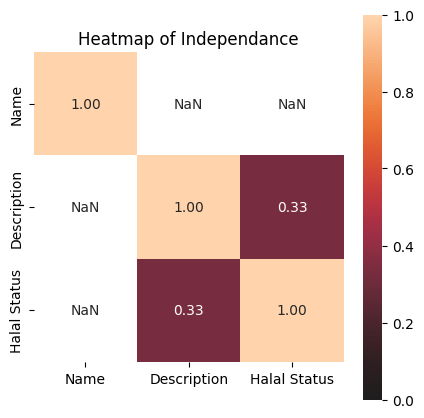

In [144]:
## heatmap of independence: food dataset
associations(food,figsize=(5,5), title = "Heatmap of Independance")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dython/nominal.py:153: RuntimeWarning: Unable to 

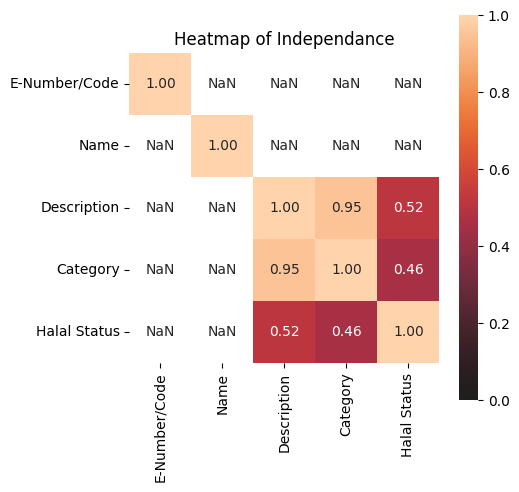

In [145]:
## heatmap of independence: codes dataset
associations(codes,figsize=(5,5), title = "Heatmap of Independance")
plt.show()

In [146]:
# counts: food dataset
counts = food.apply(pd.value_counts).fillna(0)

In [147]:
## correlation matrix
corr_matrix = counts.corr()
corr_matrix

,Name,Description,Halal Status
Name,1.000000,-0.683313,-0.387984
Description,-0.683313,1.000000,-0.029457
Halal Status,-0.387984,-0.029457,1.000000


<Axes: title={'center': 'Heatmap of Feature Counts'}>

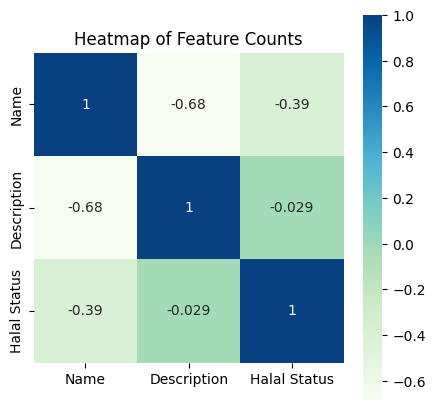

In [148]:
## heatmap of feature counts
plt.figure(figsize=(5,5))
plt.title("Heatmap of Feature Counts")
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", square=True)

In [149]:
# counts: codes dataset
counts2 = codes.apply(pd.value_counts).fillna(0)

In [150]:
## correlation matrix
corr_matrix2 = counts2.corr()
corr_matrix2

,E-Number/Code,Name,Description,Category,Halal Status
E-Number/Code,1.000000,-0.799331,-0.168847,-0.106171,-0.069005
Name,-0.799331,1.000000,-0.168847,-0.106171,-0.069005
Description,-0.168847,-0.168847,1.000000,0.571346,-0.014576
Category,-0.106171,-0.106171,0.571346,1.000000,-0.009166
Halal Status,-0.069005,-0.069005,-0.014576,-0.009166,1.000000


<Axes: title={'center': 'Heatmap of Feature Counts'}>

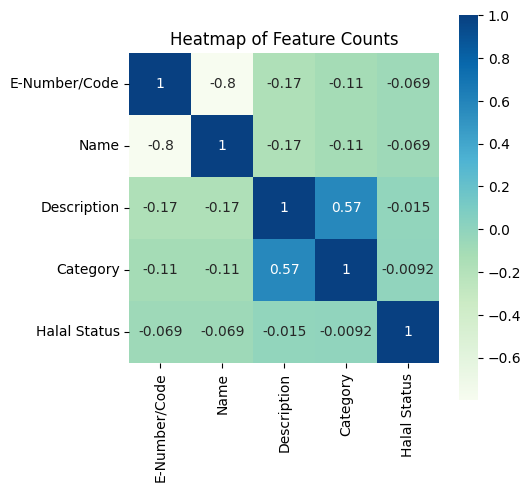

In [151]:
##heatmap of feature counts
plt.figure(figsize=(5,5))
plt.title("Heatmap of Feature Counts")
sns.heatmap(corr_matrix2, annot=True, cmap="GnBu", square=True)

In [152]:
## bar charts: food dataset
food.value_counts

<bound method DataFrame.value_counts of                                                   Name    Description  \
0                                                Camel        Animals   
1                                                  Cow        Animals   
2                                                Sheep        Animals   
3                                                 Goat        Animals   
4                                                 Deer        Animals   
..                                                 ...            ...   
112                                             Honey   Miscallaneous   
113                                              Sugar  Miscallaneous   
114                                              Syrup  Miscallaneous   
115  Chocolate liquor (roasted ground cocoa bean sy...  Miscallaneous   
116              Chocolate liqueur (made from alcohol)  Miscallaneous   

    Halal Status  
0          Halal  
1          Halal  
2          Halal  
3      

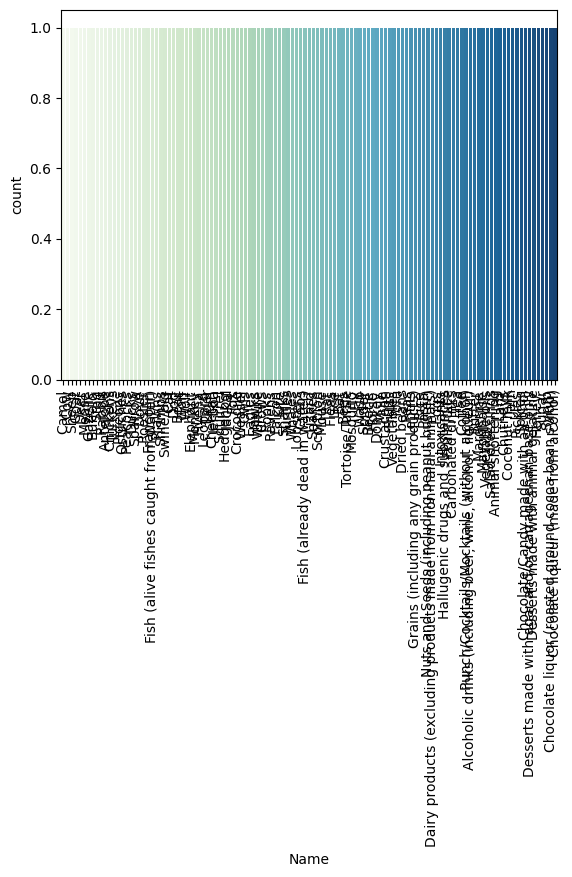

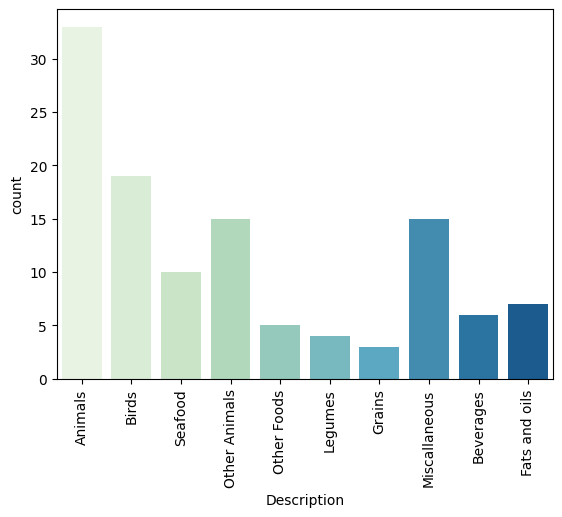

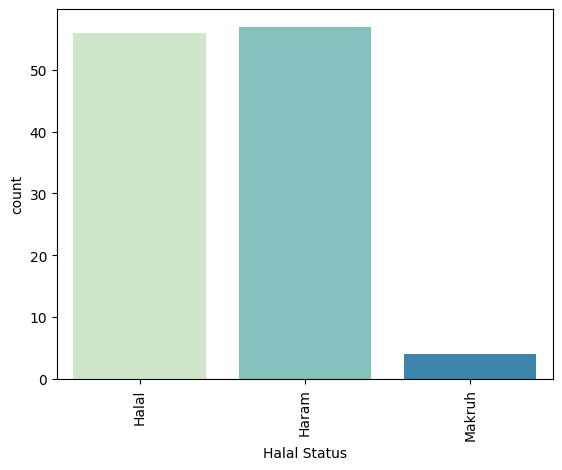

In [153]:
for i in food.columns: # excluding name feature as each feature is unique
    sns.countplot(data=food,x=i, palette="GnBu")
    plt.xticks(rotation=90)
    plt.show(80,80)

<Axes: title={'center': 'Distribution of Description by Halal Status'}, xlabel='Description', ylabel='count'>

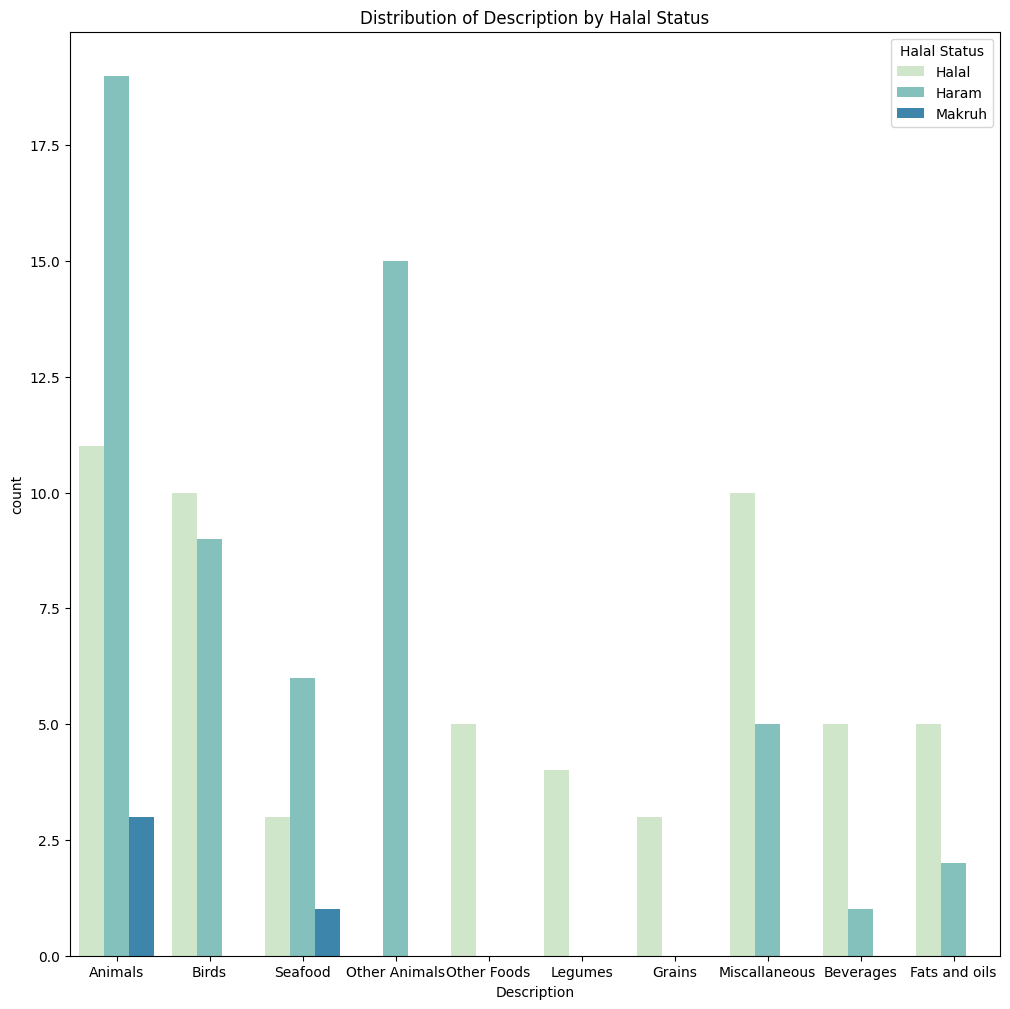

In [154]:
## distribution of description by halal status

plt.figure(figsize=(12, 12))
plt.subplot().set_title('Distribution of Description by Halal Status')
sns.countplot(x='Description', hue='Halal Status', palette='GnBu', data=food)

In [155]:
## bar charts: codes dataset
codes.value_counts

<bound method DataFrame.value_counts of     E-Number/Code                                 Name  \
0            E100                    Curcumin/Turmeric   
1            E101              Riboflavin (Vitamin B2)   
2            E102                           Tartrazine   
3            E104                     Quinoline Yellow   
4            E110  Sunset Yellow FCF / Orange Yellow S   
..            ...                                  ...   
234           920             L-Cysteine Hydrochloride   
235           924                    Potassium Bromate   
236           925                             Chlorine   
237           926                     Chlorine Dioxide   
238           927                     Azodicarbonamide   

                                       Description  \
0                                            Color   
1                                            Color   
2                                            Color   
3                                            Co

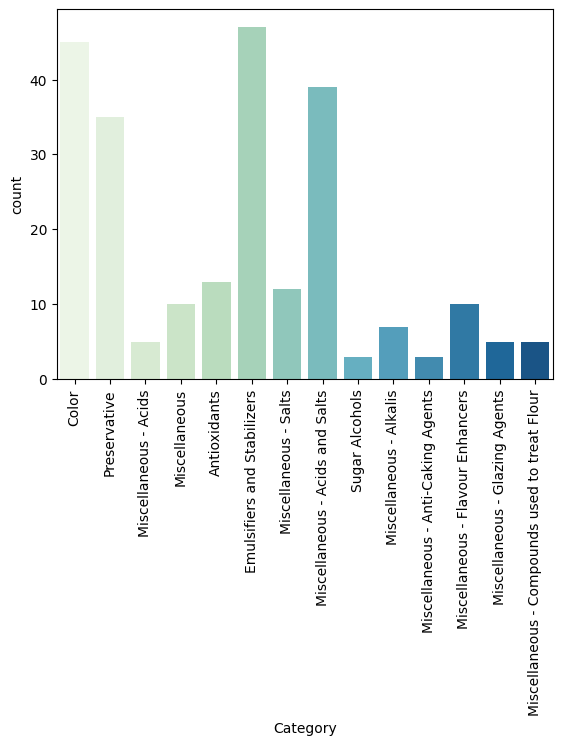

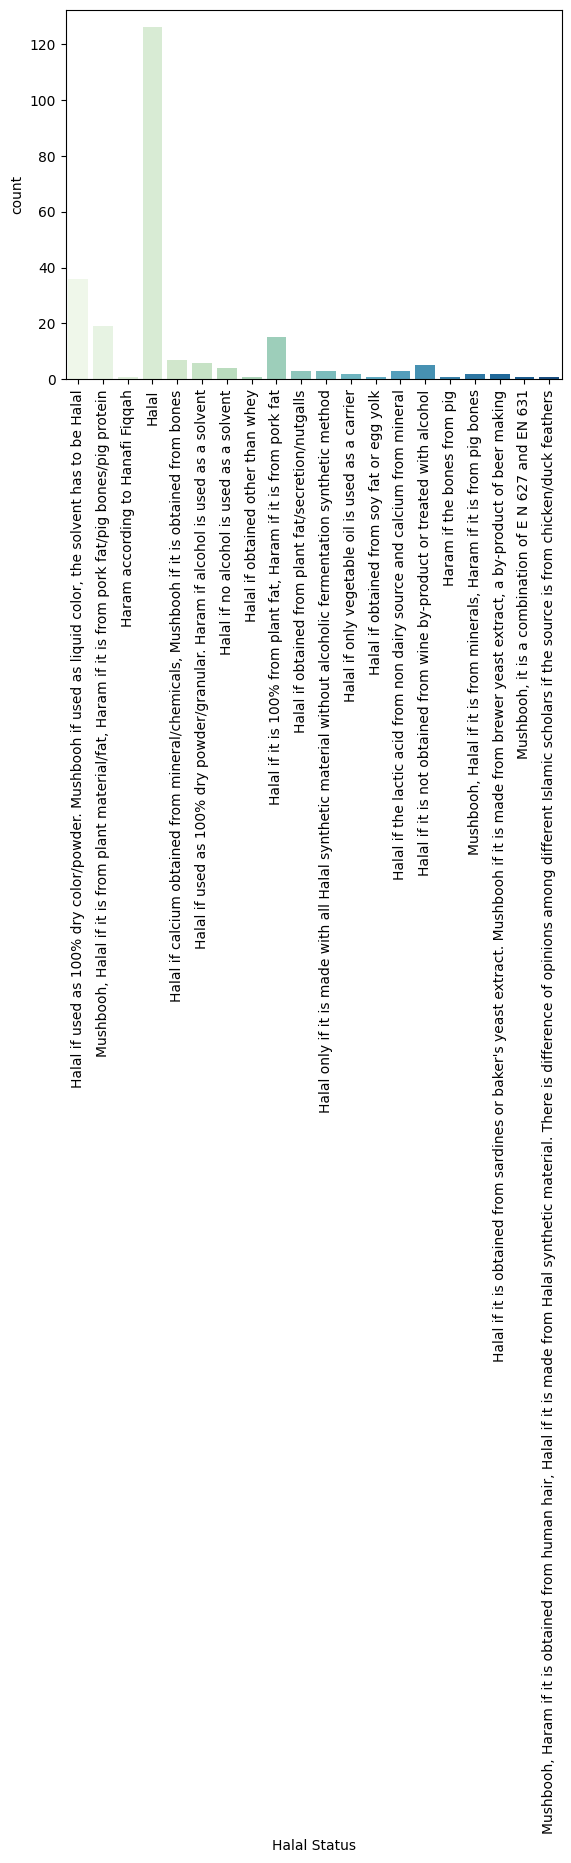

In [156]:
for i in codes.columns[3:5]: # excluding code and name feature as each feature is unique
    sns.countplot(data=codes,x=i, palette="GnBu")
    plt.xticks(rotation=90)
    plt.show(80,80)

<Axes: title={'center': 'Distribution of Description Category by Halal Status'}, xlabel='Category', ylabel='count'>

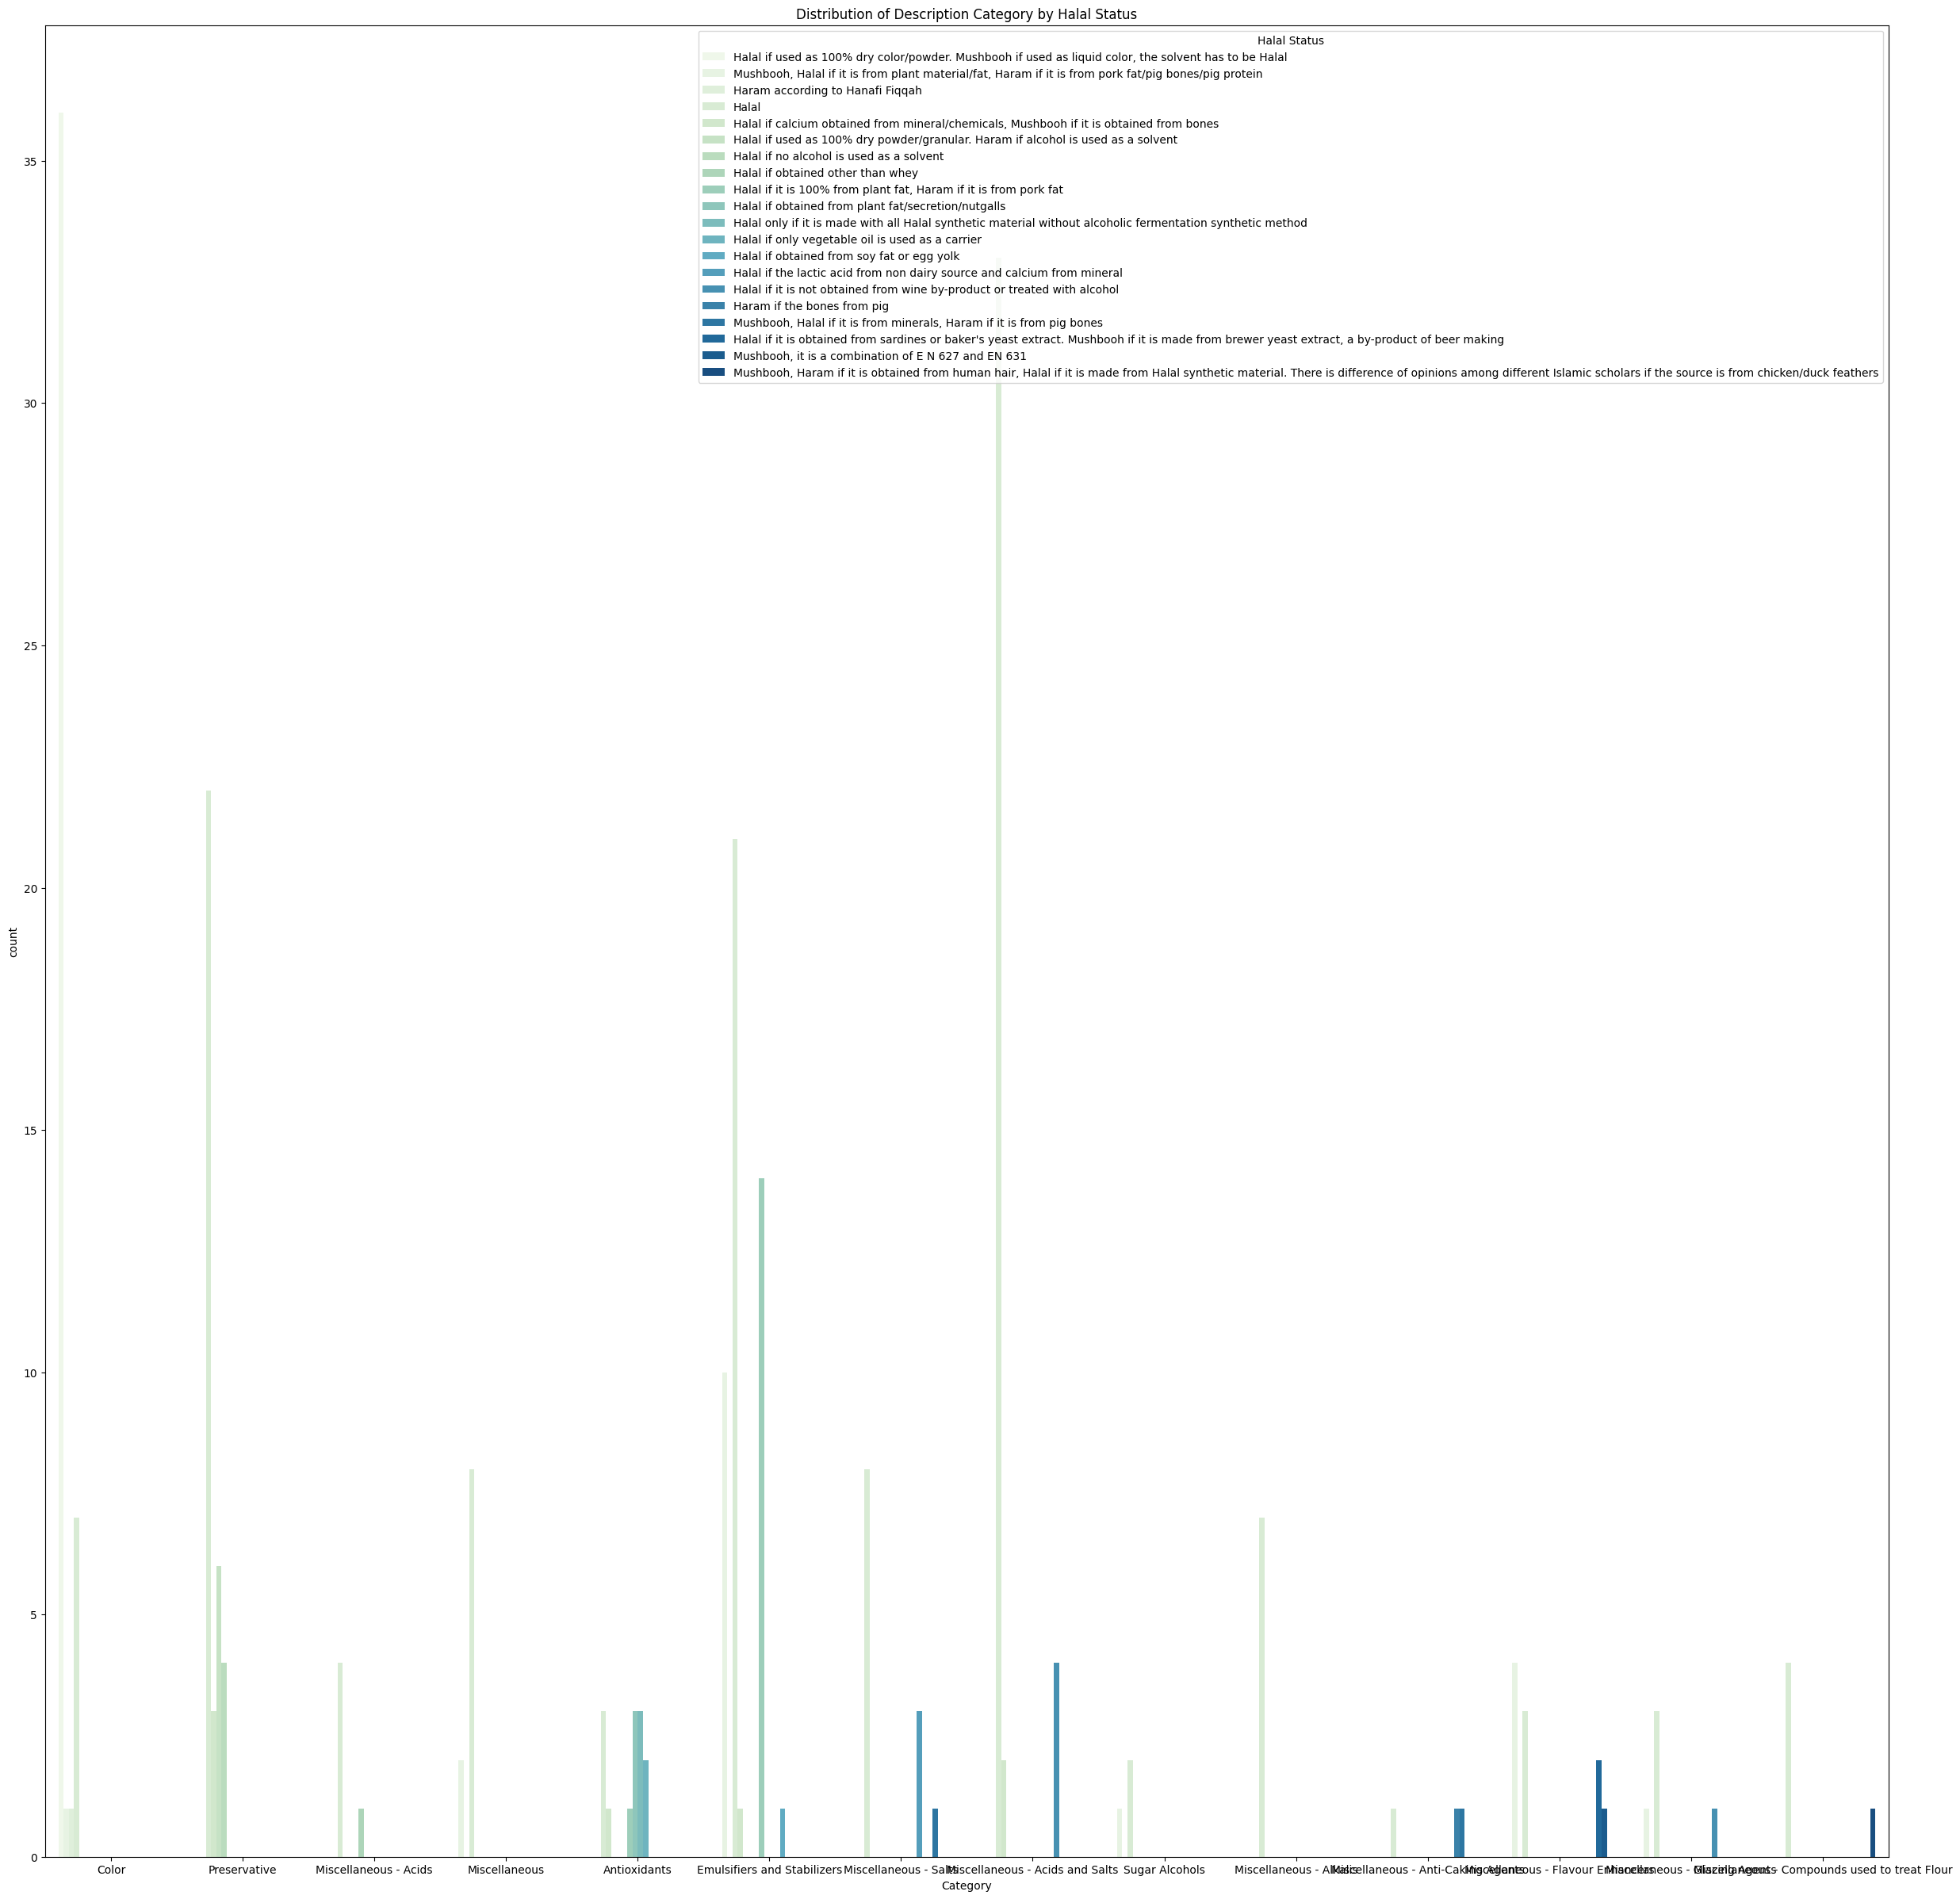

In [157]:
## distribution of category by halal status

plt.figure(figsize=(30, 30))
plt.subplot().set_title('Distribution of Description Category by Halal Status')
sns.countplot(x='Category', hue='Halal Status', palette='GnBu', data=codes)

<Axes: title={'center': 'Food Dataset: Description'}, ylabel='Description'>

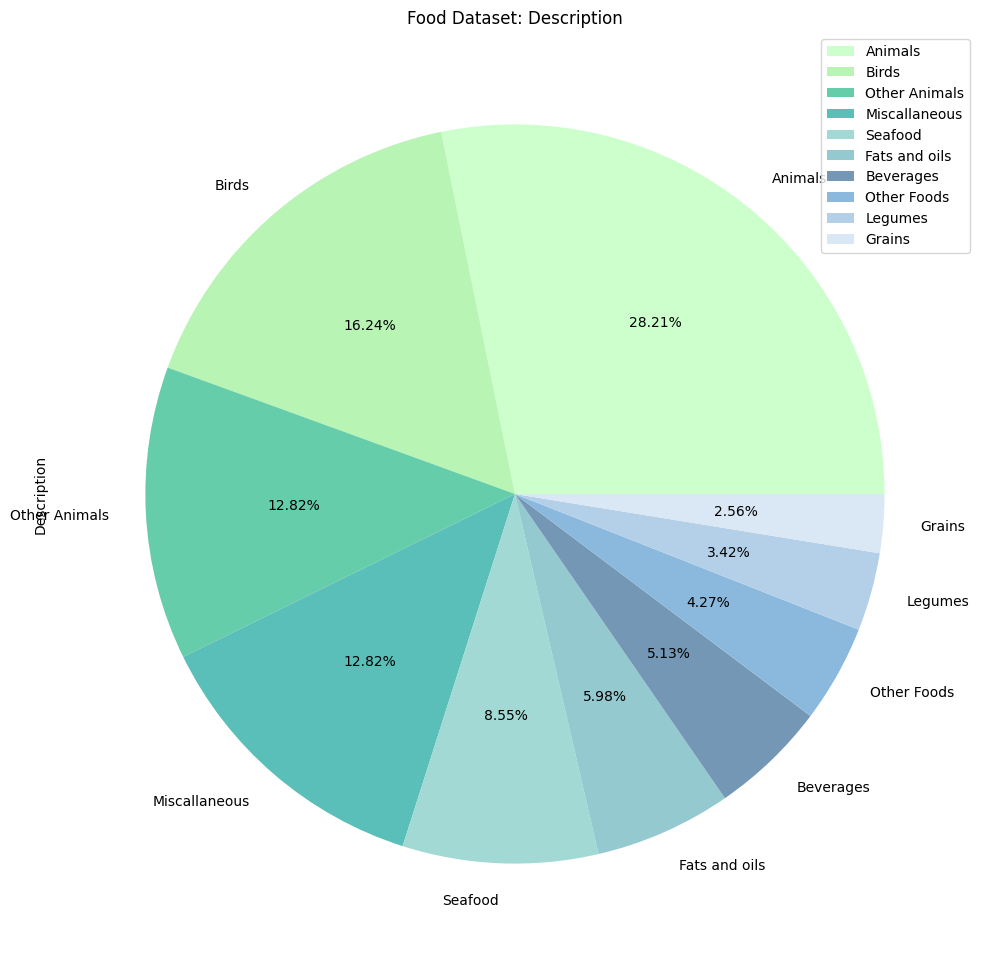

In [158]:
## pie charts: food dataset
colors=['#CCFFCC', '#b8f5b5', '#66CDAA', '#5abfb8', '#a2d9d4', '#93c9cf', '#7397b4', '#8bb9dd', '#b3d0e8', '#dae7f4']

df_food = pd.DataFrame(food['Description'].value_counts())
df_food.reset_index(inplace= True)
fig, ax = plt.subplots()
df_food.plot(kind = 'pie', y = 'Description', title = 'Food Dataset: Description', labels = ['Animals', 'Birds', 'Other Animals', 'Miscallaneous', 'Seafood', 'Fats and oils', 'Beverages', 'Other Foods', 'Legumes', 'Grains'], colors = colors, autopct='%1.2f%%', ax=ax, figsize=(12,12))

<Axes: title={'center': 'Food Dataset: Halal Status'}, ylabel='Halal Status'>

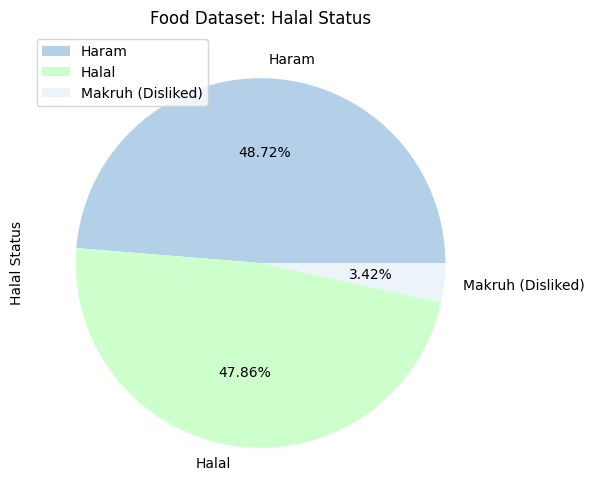

In [159]:
colors2=['#b3d0e8','#CCFFCC','#ecf3f9']

df_food = pd.DataFrame(food['Halal Status'].value_counts())
df_food.reset_index(inplace= True)
fig, ax = plt.subplots()
df_food.plot(kind = 'pie', y = 'Halal Status', title = 'Food Dataset: Halal Status', labels = ['Haram', 'Halal', 'Makruh (Disliked)'], colors = colors2, autopct='%1.2f%%', ax=ax, figsize=(6,6))

In [160]:
## pie charts: codes dataset
for name in codes.columns:
    print(name,(codes['Category']).unique()) ## detect unique entriese for category

E-Number/Code ['Color' 'Preservative' 'Miscellaneous - Acids' 'Miscellaneous'
 'Antioxidants' 'Emulsifiers and Stabilizers' 'Miscellaneous - Salts'
 'Miscellaneous - Acids and Salts' 'Sugar Alcohols'
 'Miscellaneous - Alkalis' 'Miscellaneous - Anti-Caking Agents'
 'Miscellaneous - Flavour Enhancers' 'Miscellaneous - Glazing Agents'
 'Miscellaneous - Compounds used to treat Flour']
Name ['Color' 'Preservative' 'Miscellaneous - Acids' 'Miscellaneous'
 'Antioxidants' 'Emulsifiers and Stabilizers' 'Miscellaneous - Salts'
 'Miscellaneous - Acids and Salts' 'Sugar Alcohols'
 'Miscellaneous - Alkalis' 'Miscellaneous - Anti-Caking Agents'
 'Miscellaneous - Flavour Enhancers' 'Miscellaneous - Glazing Agents'
 'Miscellaneous - Compounds used to treat Flour']
Description ['Color' 'Preservative' 'Miscellaneous - Acids' 'Miscellaneous'
 'Antioxidants' 'Emulsifiers and Stabilizers' 'Miscellaneous - Salts'
 'Miscellaneous - Acids and Salts' 'Sugar Alcohols'
 'Miscellaneous - Alkalis' 'Miscellaneous -

<Axes: title={'center': 'Codes Dataset: Description Category'}, ylabel='Category'>

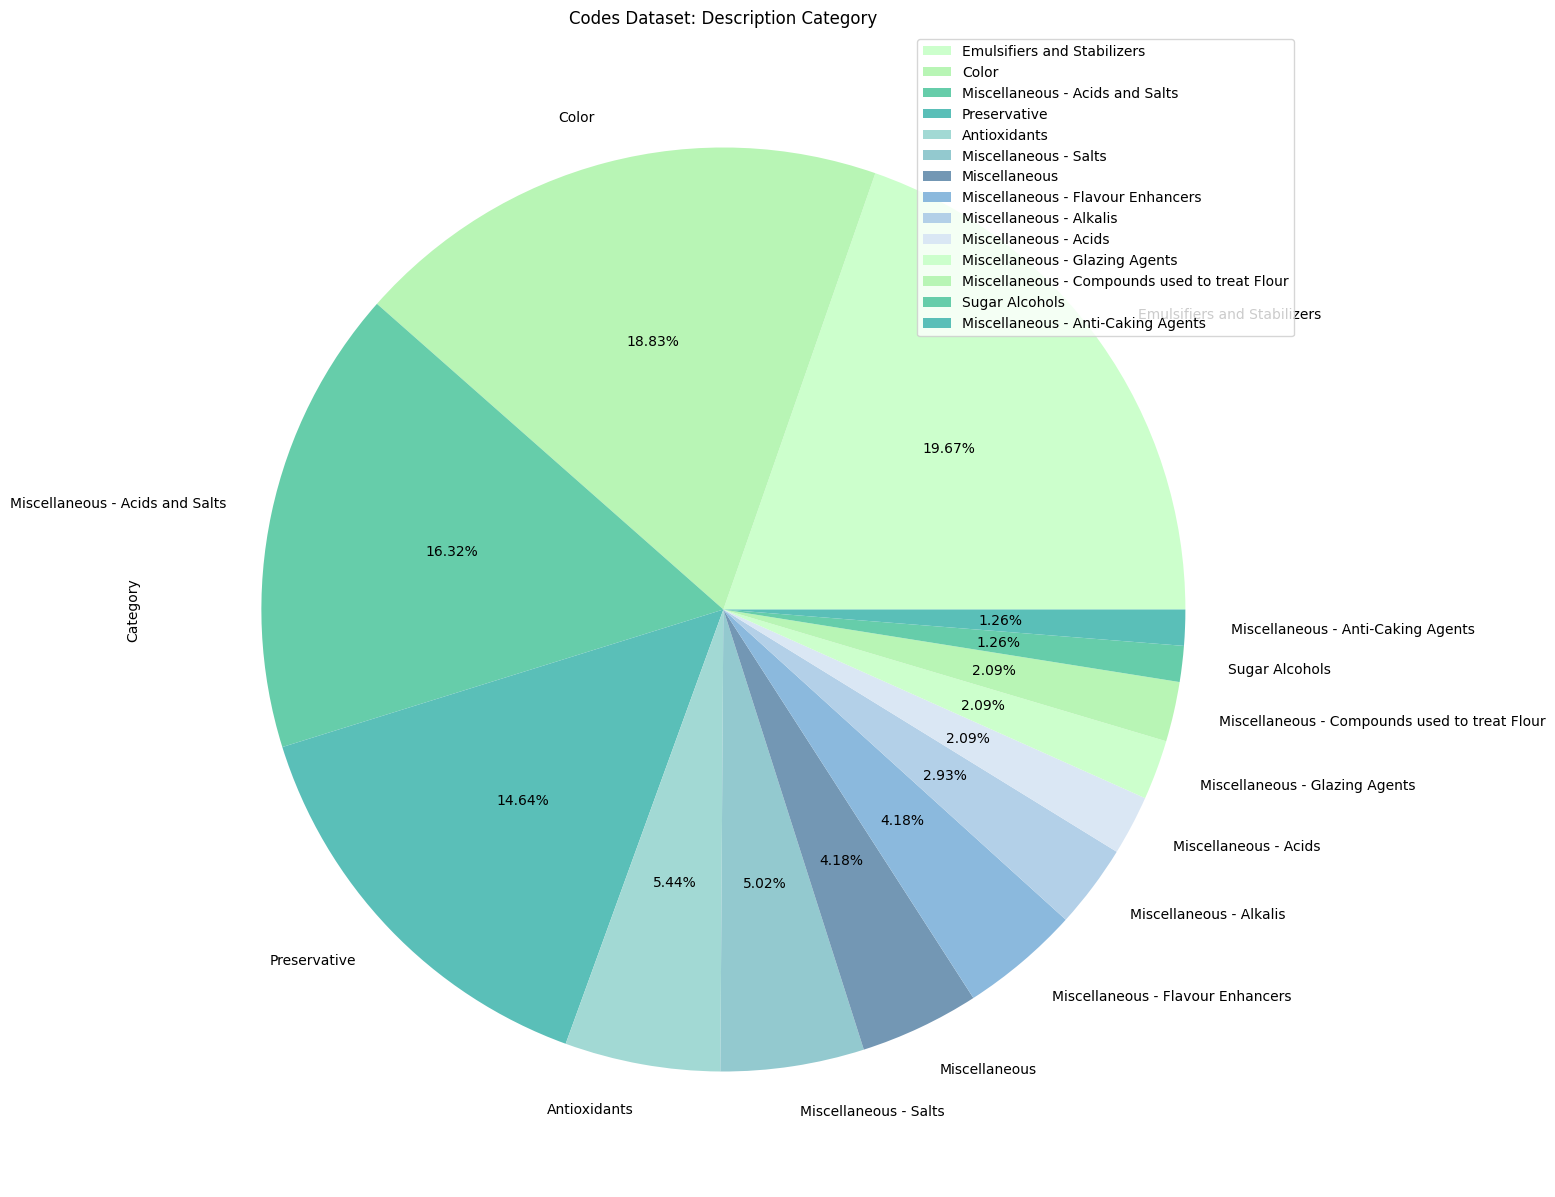

In [161]:
colors=['#CCFFCC', '#b8f5b5', '#66CDAA', '#5abfb8', '#a2d9d4', '#93c9cf', '#7397b4', '#8bb9dd', '#b3d0e8', '#dae7f4']

df_codes = pd.DataFrame(codes['Category'].value_counts())
df_codes.reset_index(inplace= True)
fig, ax = plt.subplots()
df_codes.plot(kind = 'pie', y = 'Category', title = 'Codes Dataset: Description Category', labels = ['Emulsifiers and Stabilizers', 'Color', 'Miscellaneous - Acids and Salts', 'Preservative', 'Antioxidants', 'Miscellaneous - Salts', 'Miscellaneous', 'Miscellaneous - Flavour Enhancers',  'Miscellaneous - Alkalis', 'Miscellaneous - Acids', 'Miscellaneous - Glazing Agents', 'Miscellaneous - Compounds used to treat Flour', 'Sugar Alcohols', 'Miscellaneous - Anti-Caking Agents'], colors = colors, autopct='%1.2f%%', ax=ax, figsize=(15,15))

In [162]:
for name in codes.columns:
    print(name,(codes['Halal Status']).unique()) ## detect unique entries for halal status

E-Number/Code ['Halal if used as 100% dry color/powder. Mushbooh if used as liquid color, the solvent has to be Halal'
 'Mushbooh, Halal if it is from plant material/fat, Haram if it is from pork fat/pig bones/pig protein'
 'Haram according to Hanafi Fiqqah' 'Halal'
 'Halal\xa0if calcium obtained from mineral/chemicals, Mushbooh if it is obtained from bones'
 'Halal if used as 100% dry powder/granular. Haram if alcohol is used\xa0as a solvent'
 'Halal if no alcohol is used\xa0as a solvent'
 'Halal\xa0if obtained other than whey'
 'Halal if it is 100% from plant fat, Haram if it is from pork fat'
 'Halal if obtained from plant fat/secretion/nutgalls'
 'Halal only if it is made with all Halal synthetic material\xa0without alcoholic fermentation synthetic method'
 'Halal if only vegetable oil is used as a carrier'
 'Halal if obtained from soy fat or egg yolk'
 'Halal\xa0if the lactic acid from non dairy source and calcium from mineral'
 'Halal if it is not obtained from wine by-product or

<Axes: title={'center': 'Codes Dataset: Halal Status'}, ylabel='Halal Status'>

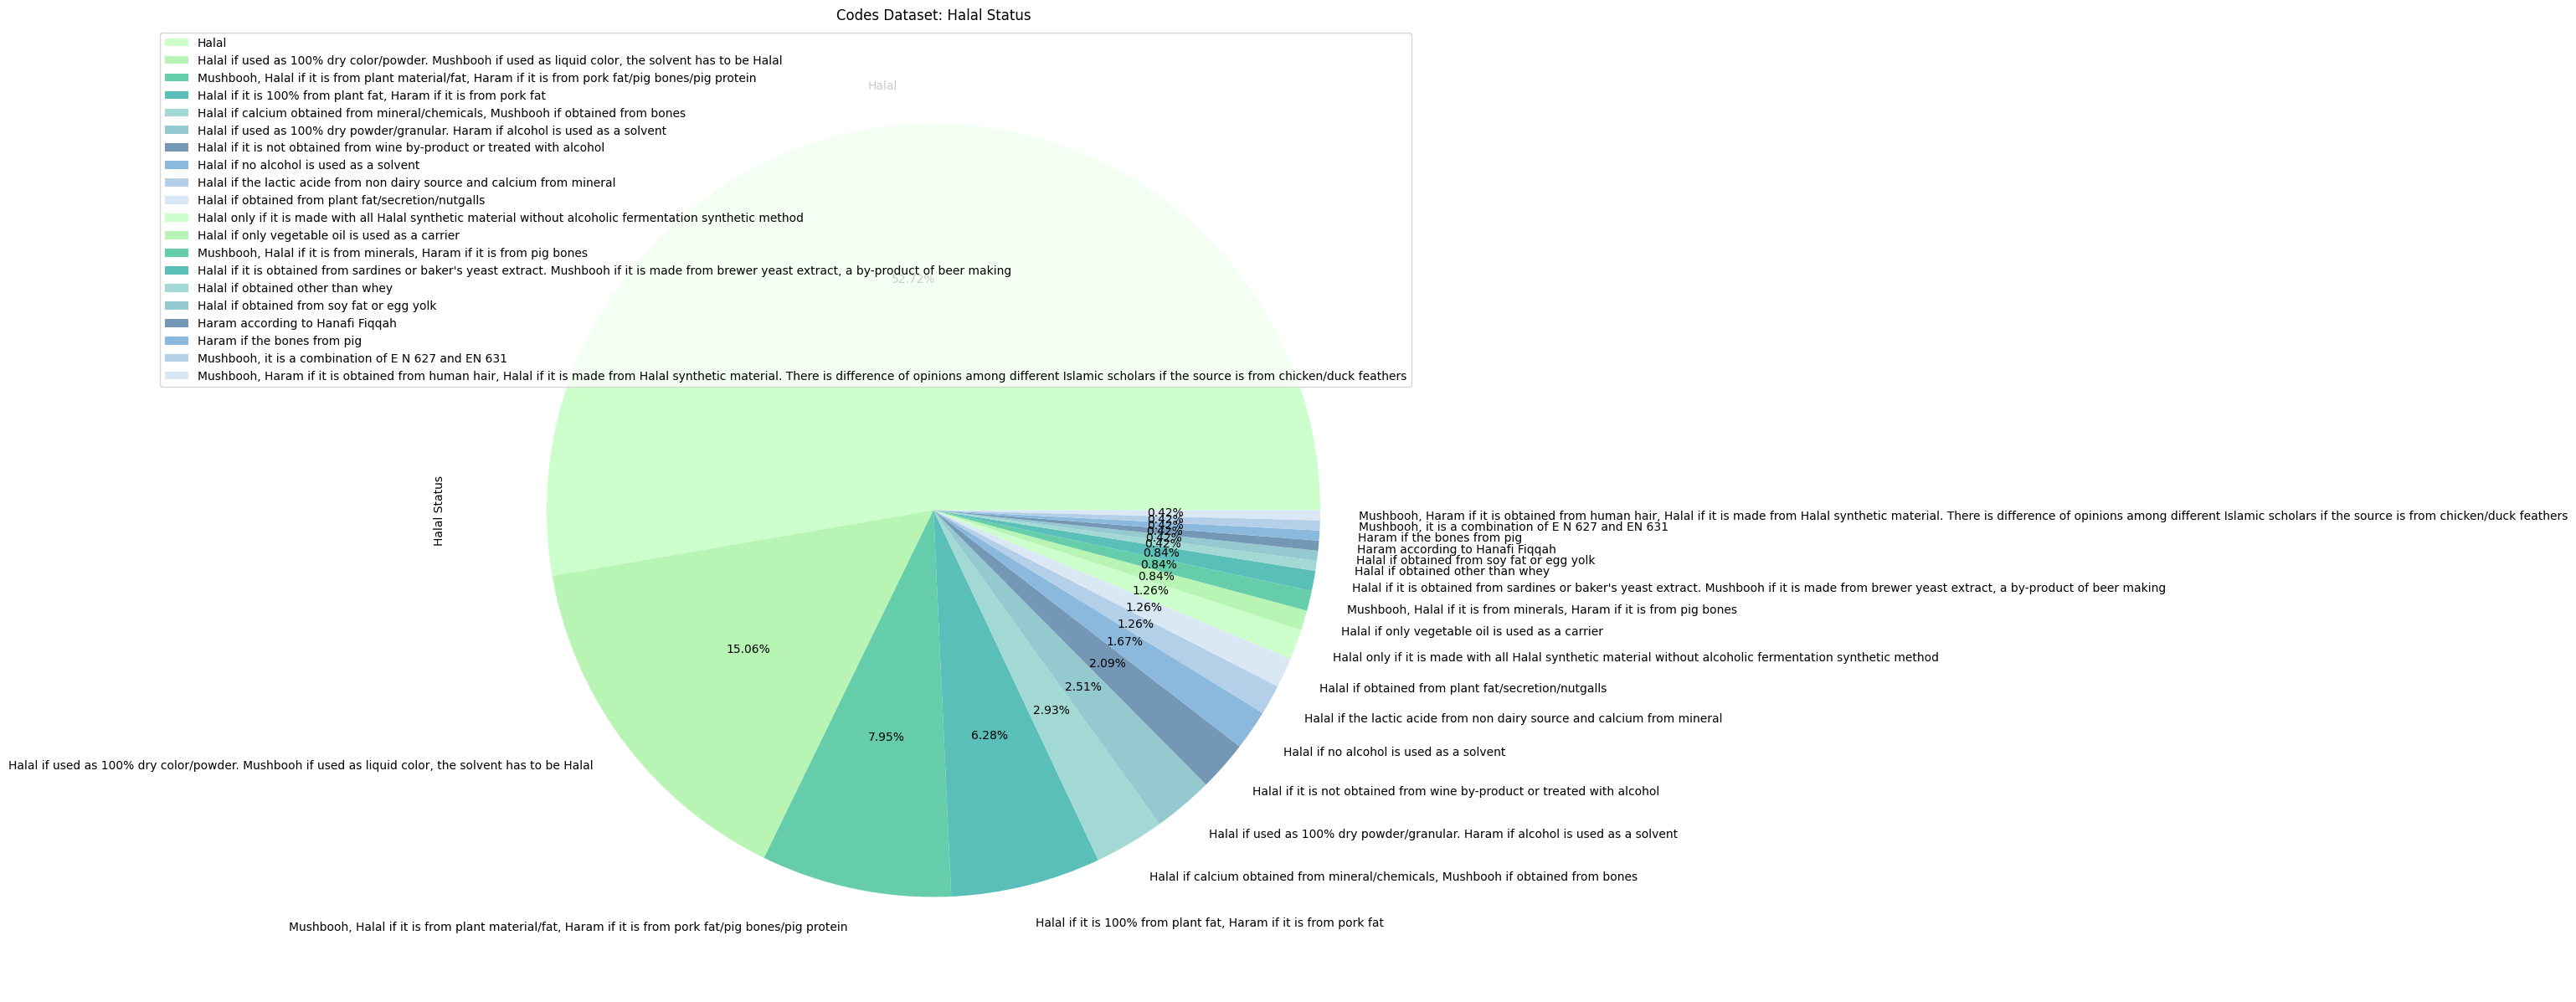

In [163]:
colors=['#CCFFCC', '#b8f5b5', '#66CDAA', '#5abfb8', '#a2d9d4', '#93c9cf', '#7397b4', '#8bb9dd', '#b3d0e8', '#dae7f4']

df_codes = pd.DataFrame(codes['Halal Status'].value_counts())
df_codes.reset_index(inplace= True)
fig, ax = plt.subplots()
df_codes.plot(kind = 'pie', y = 'Halal Status', title = 'Codes Dataset: Halal Status', labels = ['Halal', 'Halal if used as 100% dry color/powder. Mushbooh if used as liquid color, the solvent has to be Halal', 'Mushbooh, Halal if it is from plant material/fat, Haram if it is from pork fat/pig bones/pig protein',  'Halal if it is 100% from plant fat, Haram if it is from pork fat', 'Halal if calcium obtained from mineral/chemicals, Mushbooh if obtained from bones','Halal if used as 100% dry powder/granular. Haram if alcohol is used as a solvent', 'Halal if it is not obtained from wine by-product or treated with alcohol', 'Halal if no alcohol is used as a solvent', 'Halal if the lactic acide from non dairy source and calcium from mineral', 'Halal if obtained from plant fat/secretion/nutgalls', 'Halal only if it is made with all Halal synthetic material without alcoholic fermentation synthetic method', 'Halal if only vegetable oil is used as a carrier', 'Mushbooh, Halal if it is from minerals, Haram if it is from pig bones',"Halal if it is obtained from sardines or baker's yeast extract. Mushbooh if it is made from brewer yeast extract, a by-product of beer making", 'Halal if obtained other than whey', 'Halal if obtained from soy fat or egg yolk',  'Haram according to Hanafi Fiqqah','Haram if the bones from pig', 'Mushbooh, it is a combination of E N 627 and EN 631', 'Mushbooh, Haram if it is obtained from human hair, Halal if it is made from Halal synthetic material. There is difference of opinions among different Islamic scholars if the source is from chicken/duck feathers'], colors = colors, autopct='%1.2f%%', ax=ax, figsize=(15,15))

**DATA PREPROCESSING**

In [164]:
food

,Name,Description,Halal Status
0,Camel,Animals,Halal
1,Cow,Animals,Halal
2,Sheep,Animals,Halal
3,Goat,Animals,Halal
4,Deer,Animals,Halal
...,...,...,...
112,Honey,Miscallaneous,Halal
113,Sugar,Miscallaneous,Halal
114,Syrup,Miscallaneous,Halal
115,Chocolate liquor (roasted ground cocoa bean sy...,Miscallaneous,Halal


In [165]:
codes

,E-Number/Code,Name,Description,Category,Halal Status
0,E100,Curcumin/Turmeric,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
1,E101,Riboflavin (Vitamin B2),Color,Color,"Mushbooh, Halal if it is from plant material/f..."
2,E102,Tartrazine,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
3,E104,Quinoline Yellow,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
4,E110,Sunset Yellow FCF / Orange Yellow S,Color,Color,Halal if used as 100% dry color/powder. Mushbo...
...,...,...,...,...,...
234,920,L-Cysteine Hydrochloride,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,"Mushbooh, Haram if it is obtained from human h..."
235,924,Potassium Bromate,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,Halal
236,925,Chlorine,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,Halal
237,926,Chlorine Dioxide,Miscellaneous - Compounds used to treat Flour,Miscellaneous - Compounds used to treat Flour,Halal


In [166]:
## drop category feature as it is similar to description feature, using desciption for higher accuracy of data used
codes.drop('Category',axis=1,inplace=True)

In [167]:
codes

,E-Number/Code,Name,Description,Halal Status
0,E100,Curcumin/Turmeric,Color,Halal if used as 100% dry color/powder. Mushbo...
1,E101,Riboflavin (Vitamin B2),Color,"Mushbooh, Halal if it is from plant material/f..."
2,E102,Tartrazine,Color,Halal if used as 100% dry color/powder. Mushbo...
3,E104,Quinoline Yellow,Color,Halal if used as 100% dry color/powder. Mushbo...
4,E110,Sunset Yellow FCF / Orange Yellow S,Color,Halal if used as 100% dry color/powder. Mushbo...
...,...,...,...,...
234,920,L-Cysteine Hydrochloride,Miscellaneous - Compounds used to treat Flour,"Mushbooh, Haram if it is obtained from human h..."
235,924,Potassium Bromate,Miscellaneous - Compounds used to treat Flour,Halal
236,925,Chlorine,Miscellaneous - Compounds used to treat Flour,Halal
237,926,Chlorine Dioxide,Miscellaneous - Compounds used to treat Flour,Halal


In [168]:
## define x and y variables for food dataset
X=food.drop('Halal Status',axis=1)
y=food['Halal Status'] 
# X=food.iloc[:,:-1]
# y=food.iloc[:,-1]

In [169]:
X

,Name,Description
0,Camel,Animals
1,Cow,Animals
2,Sheep,Animals
3,Goat,Animals
4,Deer,Animals
...,...,...
112,Honey,Miscallaneous
113,Sugar,Miscallaneous
114,Syrup,Miscallaneous
115,Chocolate liquor (roasted ground cocoa bean sy...,Miscallaneous


In [170]:
## convert data to numerical and arrays
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

In [171]:
for name in X.columns:
    print(name,(X['Description']).unique())

Name [0 2 9 7 8 5 4 6 1 3]
Description [0 2 9 7 8 5 4 6 1 3]


In [172]:
X

,Name,Description
0,9,0
1,20,0
2,93,0
3,47,0
4,26,0
...,...,...
112,52,6
113,101,6
114,103,6
115,15,6


In [173]:
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [174]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1])

In [175]:
## define x and y variables for codes dataset
X1=codes.drop('Halal Status',axis=1)
y1=codes['Halal Status'] 

In [176]:
X1

,E-Number/Code,Name,Description
0,E100,Curcumin/Turmeric,Color
1,E101,Riboflavin (Vitamin B2),Color
2,E102,Tartrazine,Color
3,E104,Quinoline Yellow,Color
4,E110,Sunset Yellow FCF / Orange Yellow S,Color
...,...,...,...
234,920,L-Cysteine Hydrochloride,Miscellaneous - Compounds used to treat Flour
235,924,Potassium Bromate,Miscellaneous - Compounds used to treat Flour
236,925,Chlorine,Miscellaneous - Compounds used to treat Flour
237,926,Chlorine Dioxide,Miscellaneous - Compounds used to treat Flour


In [177]:
## convert data to numerical and arrays
Encoder_X1 = LabelEncoder() 
for col1 in X1.columns:
    X1[col1] = Encoder_X1.fit_transform(X1[col1])

In [178]:
for name1 in X1.columns:
    print(name,(X1['Description']).unique())

Description [ 4  5  6 33 35 15 34 14  0  1  2  3  7 27 22 30 26  8 12 36 11  9 13 19
 28 10 16 17 18 20 31 21 29 32 24 25 23]
Description [ 4  5  6 33 35 15 34 14  0  1  2  3  7 27 22 30 26  8 12 36 11  9 13 19
 28 10 16 17 18 20 31 21 29 32 24 25 23]
Description [ 4  5  6 33 35 15 34 14  0  1  2  3  7 27 22 30 26  8 12 36 11  9 13 19
 28 10 16 17 18 20 31 21 29 32 24 25 23]


In [179]:
Encoder_y1=LabelEncoder()
y1 = Encoder_y1.fit_transform(y1)

In [180]:
y1

array([ 8, 17,  8,  8,  8, 14,  8,  8,  8,  8,  8,  8,  8,  8,  8,  0,  8,
        8,  8,  0,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0, 11,  9,  9,  9,
        9,  9,  9,  0,  0,  0,  0,  0,  0, 11,  4,  4,  4,  4,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 12,  0,  0, 11,  0,  0,  0,  0, 11,  1,  5,
       10, 10, 10,  0,  5,  5,  7,  7,  6, 13, 13, 13,  0,  0,  0, 11,  2,
        2,  2,  2,  0,  0,  0, 11,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17,  8,  8,  8,  8,  8,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,
       16,  0,  0,  0,  0,  0, 16,  0,  0, 17, 17,  0,  0,  0,  0, 17, 17,
       17, 17,  3,  3, 19

In [181]:
## train the model for food dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [182]:
## train the model for codes dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=32)

**RANDOM FOREST CLASSIFIER**

In [183]:
## FOOD DATASET
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [184]:
##  make the prediction
y_pred_rf = rf.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
0,1,0
1,0,0
2,1,1
3,1,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,1
9,1,1


In [185]:
## evaluate the model accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

## CONFUSION MATRIX
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print(conf_mat_rf)

Accuracy: 0.5833333333333334
[[10  7  0]
 [ 5 11  1]
 [ 1  1  0]]


In [186]:
## CODES DATASET
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)

RandomForestClassifier()

In [187]:
##  make the prediction
y_pred_rf1 = rf1.predict(X1_test)
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_rf1})

,Actual,Predicted
0,0,0
1,8,8
2,1,1
3,0,0
4,17,17
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [188]:
## evaluate the model accuracy
accuracy_rf1 = accuracy_score(y1_test, y_pred_rf1)

## CONFUSION MATRIX
conf_mat_rf1 = confusion_matrix(y1_test, y_pred_rf1)

print("Accuracy:", accuracy_rf1)
print(conf_mat_rf1)

Accuracy: 0.7083333333333334
[[28  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0 13  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0  0  0  0  0  0  0  5]]


**LINEAR REGRESSION**

In [189]:
## FOOD DATASET
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [190]:
## make predictions
pred_lin = lin_reg.predict(X_test)

In [191]:
## create a dataframe for predictions
pd.DataFrame({'Actual':y_test, 'Predicted':pred_lin})

,Actual,Predicted
0,1,0.503054
1,0,0.515962
2,1,0.469398
3,1,0.595475
4,0,0.509416
5,0,0.514561
6,1,0.617240
7,0,0.571030
8,0,0.626805
9,1,0.582182


In [192]:
## model evaluation
# MAE Mean Absolute Error - average error between the actual and the predicted
# MSE Mean Square Error - average of the squared differences between predicted value and actual value
# RMSE Root Mean Square Error - square root of the average of the squared differenced between the predicted value and actual value
# R2 - R Squared - measures the variation/changes in the target variable (used to determine if model has done well: R2 value is between 0-1, the higher R2 means done well)

print('MAE:', metrics.mean_absolute_error(y_test,pred_lin))
print('MSE:', metrics.mean_squared_error(y_test,pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_lin)))
print('R2:', metrics.r2_score(y_test,pred_lin))

MAE: 0.5583463123146999
MSE: 0.37120415829759934
RMSE: 0.6092652610297089
R2: -0.04810585872263329


In [193]:
## CODES DATASET
lin_reg1 = LinearRegression()
lin_reg1.fit(X1_train, y1_train)

LinearRegression()

In [194]:
## make predictions
pred_lin1 = lin_reg1.predict(X1_test)

In [195]:
## create a dataframe for predictions
pd.DataFrame({'Actual':y1_test, 'Predicted':pred_lin1})

,Actual,Predicted
0,0,3.337862
1,8,4.534634
2,1,2.731012
3,0,4.690417
4,17,5.803709
...,...,...
67,0,5.629159
68,0,5.526945
69,0,1.466422
70,0,5.632137


In [196]:
## model evaluation
# MAE Mean Absolute Error - average error between the actual and the predicted
# MSE Mean Square Error - average of the squared differences between predicted value and actual value
# RMSE Root Mean Square Error - square root of the average of the squared differenced between the predicted value and actual value
# R2 - R Squared - measures the variation/changes in the target variable (used to determine if model has done well: R2 value is between 0-1, the higher R2 means done well)

print('MAE:', metrics.mean_absolute_error(y1_test,pred_lin1))
print('MSE:', metrics.mean_squared_error(y1_test,pred_lin1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test,pred_lin1)))
print('R2:', metrics.r2_score(y1_test,pred_lin1))

MAE: 4.727417991897589
MSE: 35.27600220083881
RMSE: 5.939360420183204
R2: 0.01184572059704847


**LOGISTIC REGRESSION**

In [197]:
## FOOD DATASET
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [198]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,1,0
1,0,1
2,1,0
3,1,1
4,0,1
5,0,0
6,1,1
7,0,1
8,0,1
9,1,1


In [199]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat_LR = confusion_matrix(y_test, pred_LR)

print("Accuracy:", accuracy_LR)
print(conf_mat_LR)

Accuracy: 0.3888888888888889
[[ 4 13  0]
 [ 7 10  0]
 [ 2  0  0]]


In [200]:
## CODES DATASET
model_LR1 = LogisticRegression()
model_LR1.fit(X1_train, y1_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [201]:
##  make the prediction
pred_LR1 = model_LR1.predict(X1_test)
pd.DataFrame({'Actual': y1_test, 'Predicted': pred_LR1})

,Actual,Predicted
0,0,0
1,8,0
2,1,1
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [202]:
## evaluate the model accuracy
accuracy_LR1 = accuracy_score(y1_test, pred_LR1)

## CONFUSION MATRIX
conf_mat_LR1 = confusion_matrix(y1_test, pred_LR1)

print("Accuracy:", accuracy_LR1)
print(conf_mat_LR1)

Accuracy: 0.4722222222222222
[[28  0  0  0  0  1  0  2  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [10  2  0  0  0  4  0  1  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0]]


**NAIVE-BAYES**

In [203]:
## FOOD DATASET
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [204]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,1,0
1,0,1
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,0,1
8,0,1
9,1,1


In [205]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)

## CONFUSION MATRIX
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)

print("Accuracy:", accuracy_NB)
print(conf_mat_NB)

Accuracy: 0.3888888888888889
[[ 4 13  0]
 [ 7 10  0]
 [ 2  0  0]]


In [206]:
## CODES DATASET
model_NB1 = GaussianNB()
model_NB1.fit(X1_train, y1_train)

GaussianNB()

In [207]:
## predict the test set
y_pred_NB1 = model_NB1.predict(X1_test)
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_NB1})

,Actual,Predicted
0,0,9
1,8,8
2,1,1
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [208]:
## Evaluate the naive bayes model
accuracy_NB1 = accuracy_score(y1_test, y_pred_NB1)

## CONFUSION MATRIX
conf_mat_NB1 = confusion_matrix(y1_test, y_pred_NB1)

print("Accuracy:", accuracy_NB1)
print(conf_mat_NB1)

Accuracy: 0.5694444444444444
[[26  0  0  0  1  0  1  3  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 7  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0]]


**K-Nearest Neighbours**

In [209]:
## FOOD DATASET
Knn_model = KNeighborsClassifier(n_neighbors=5)

In [210]:
## train my model
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [211]:
## make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,1,0
1,0,1
2,1,1
3,1,0
4,0,0
5,0,0
6,1,0
7,0,1
8,0,0
9,1,1


In [212]:
## Evaluate the knn model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
## CONFUSION MATRIX
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print(conf_mat_knn)

Accuracy: 0.5277777777777778
[[ 9  8  0]
 [ 7 10  0]
 [ 1  1  0]]


In [213]:
## CODES DATASET
Knn_model1 = KNeighborsClassifier(n_neighbors=5)

In [214]:
## train my model
Knn_model1.fit(X1_train, y1_train)

KNeighborsClassifier()

In [215]:
## make prediction
y_pred_knn1 = Knn_model1.predict(X1_test)
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_knn1})

,Actual,Predicted
0,0,4
1,8,8
2,1,1
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,1
70,0,0


In [216]:
## Evaluate the knn model
accuracy_knn1 = accuracy_score(y1_test, y_pred_knn1)

## CONFUSION MATRIX
conf_mat_knn1 = confusion_matrix(y1_test, y_pred_knn1)

print("Accuracy:", accuracy_knn1)
print(conf_mat_knn1)

Accuracy: 0.6111111111111112
[[25  1  0  0  1  0  3  0  0  0  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0]
 [ 4  1  0  0  0  0 12  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  3]]


**DECISION TREE CLASSIFIER**

In [217]:
## FOOD DATASET
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [218]:
## train my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [219]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [220]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,1,0
1,0,1
2,1,0
3,1,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,1
9,1,1


In [221]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,1
9,1,1


In [222]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,1
9,1,1


In [223]:
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)

print(accuracy_gini)
print(conf_mat_gini)

0.4444444444444444
[[10  7  0]
 [11  6  0]
 [ 2  0  0]]


In [224]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)

print(accuracy_entropy)
print(conf_mat_entropy)

0.5555555555555556
[[14  3  0]
 [11  6  0]
 [ 2  0  0]]


In [225]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)

print(accuracy_max_depth)
print(conf_mat_max_depth)

0.5
[[12  5  0]
 [11  6  0]
 [ 2  0  0]]


In [226]:
## CODES DATASET
Decision_tree_gini1 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy1 = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth1 = DecisionTreeClassifier(max_depth=5)

In [227]:
## train my models
Decision_tree_gini1.fit(X1_train,y1_train)
Decision_tree_entropy1.fit(X1_train,y1_train)
Decision_tree_max_depth1.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=5)

In [228]:
## make prediction
y_pred_gini1 = Decision_tree_gini1.predict(X1_test)
y_pred_entropy1 = Decision_tree_entropy1.predict(X1_test)
y_pred_depth31 = Decision_tree_max_depth1.predict(X1_test)

In [229]:
## make a dataframe prediction
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_gini1})

,Actual,Predicted
0,0,0
1,8,8
2,1,0
3,0,0
4,17,17
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [230]:
## make a dataframe prediction
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_entropy1})

,Actual,Predicted
0,0,0
1,8,8
2,1,1
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [231]:
## make a dataframe prediction
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_depth31})

,Actual,Predicted
0,0,0
1,8,8
2,1,1
3,0,0
4,17,17
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [232]:
## Evaluate the gini
accuracy_gini1 = accuracy_score(y1_test, y_pred_gini1)
conf_mat_gini1 = confusion_matrix(y1_test, y_pred_gini1)

print(accuracy_gini1)
print(conf_mat_gini1)

0.6111111111111112
[[30  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0 10  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  4]]


In [233]:
## Evaluate the entropy
accuracy_entropy1 = accuracy_score(y1_test, y_pred_entropy1)
conf_mat_entropy1 = confusion_matrix(y1_test, y_pred_entropy1)

print(accuracy_entropy1)
print(conf_mat_entropy1)

0.5972222222222222
[[30  0  0  0  0  1  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0 10  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0]]


In [234]:
## Evaluate the max_depth
accuracy_max_depth1 = accuracy_score(y1_test, y_pred_depth31)
conf_mat_max_depth1 = confusion_matrix(y1_test, y_pred_depth31)

print(accuracy_max_depth1)
print(conf_mat_max_depth1)

0.625
[[30  0  0  0  0  1  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  8  0  0  0  0  2]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  4]]


**SVM CLASSIFIER**

In [235]:
## FOOD DATASET
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [236]:
# train my models
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [237]:
# predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [238]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,1
8,0,1
9,1,1


In [239]:
## make a dataframe prediction for sigmoid kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,1,1
4,0,0
5,0,1
6,1,0
7,0,0
8,0,0
9,1,0


In [240]:
## make a dataframe prediction for rbf kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
5,0,1
6,1,1
7,0,1
8,0,1
9,1,1


In [241]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.4722222222222222
Sigmoid kernel Accuracy: 0.5
rbf kernelAccuracy: 0.4444444444444444


In [242]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[8 9 0]
 [8 9 0]
 [2 0 0]]
[[10  7  0]
 [ 9  8  0]
 [ 1  1  0]]
[[ 1 16  0]
 [ 2 15  0]
 [ 1  1  0]]


In [243]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.25      0.06      0.10        17
           1       0.47      0.88      0.61        17
           2       0.00      0.00      0.00         2

    accuracy                           0.44        36
   macro avg       0.24      0.31      0.24        36
weighted avg       0.34      0.44      0.33        36



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [244]:
## CODES DATASET
clfLinear1 = svm.SVC(kernel='linear')
clfsigmoid1 = svm.SVC(kernel='sigmoid') 
clfrbf1 = svm.SVC(kernel='rbf') 

In [245]:
# train my models
clfLinear1.fit(X1_train, y1_train)
clfsigmoid1.fit(X1_train, y1_train)
clfrbf1.fit(X1_train, y1_train)

SVC()

In [246]:
# predict the response for test dataset
y_pred_linear1 = clfLinear1.predict(X1_test)
y_pred_sigmoid1 = clfsigmoid1.predict(X1_test)
y_pred_rbf1 = clfrbf1.predict(X1_test)

In [247]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_linear1})

,Actual,Predicted
0,0,0
1,8,8
2,1,1
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [248]:
## make a dataframe prediction for sigmoid kernel
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_sigmoid1})

,Actual,Predicted
0,0,0
1,8,0
2,1,0
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,8
70,0,0


In [249]:
## make a dataframe prediction for rbf kernel
pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_rbf1})

,Actual,Predicted
0,0,0
1,8,0
2,1,0
3,0,0
4,17,0
...,...,...
67,0,0
68,0,0
69,0,0
70,0,0


In [250]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y1_test, y_pred_linear1))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y1_test, y_pred_sigmoid1))
print("rbf kernelAccuracy:",metrics.accuracy_score(y1_test, y_pred_rbf1))

Linear Kernel Accuracy: 0.6527777777777778
Sigmoid kernel Accuracy: 0.4166666666666667
rbf kernelAccuracy: 0.4305555555555556


In [251]:
## confussion matrix for the kernels
conf_mat_linear1 = confusion_matrix(y1_test, y_pred_linear1)
conf_mat_sigmoid1 = confusion_matrix(y1_test, y_pred_sigmoid1)
conf_mat_rbf1 = confusion_matrix(y1_test, y_pred_rbf1)

print(conf_mat_linear1)
print(conf_mat_sigmoid1)
print(conf_mat_rbf1)

[[30  0  0  0  0  1  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 14  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0]]
[[28  0  0  0  0  3  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  2  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0]]
[[31  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0 